In [1]:
import sys
from pathlib import Path
import os 
import pickle
# Add the src/utils directory to sys.path
src_utils_path = Path("../src/utils")
sys.path.append(str(src_utils_path))

import metrics as mjo
import helper as hlp 
import WheelerKiladis_util as wk 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


In [6]:
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20/exp1/OLR_15deg_lead25_lr0.005_batch64_dropout0.1_ch_32_8_ksize_5_41_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc'
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/CNN_MLP/exp1/OLR_15deg_lead25_lr0.005_batch64_dropout0.1_ch_32_8_ksize_1_9_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc'
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/UNet_A/exp1/OLR_15deg_lead25_lr0.0001_batch64_dropout0.1_ch_32_8_ksize_1_9_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc'



In [7]:
bcc, _ = mjo.get_skill_one('ROMI',fn, rule='Iamp>1.0', datesta='2015-01-01', dateend='2020-12-31')
bcc

<xarray.DataArray ()>
array(0.45393501)

In [7]:
fn_list10 = mjo.generate_fn_list(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                               lead_list=[25,], exp_list=['1',], lat=10, fileflg='*_mem95.nc')[(25, '1')]
fn_list15 = mjo.generate_fn_list(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                               lead_list=[25,], exp_list=['1',], lat=15, fileflg='*_mem95.nc')[(25, '1')]

print(fn_list10)
print(fn_list15)

/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20/exp1/OLR_10deg_lead25_lr0.005_batch64_dropout0.3_ch_32_8_ksize_7_hidden_1024_128_opt_SGD_mom0.9_wd0.001_mem95.nc
/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20/exp1/OLR_15deg_lead25_lr0.005_batch64_dropout0.1_ch_32_8_ksize_13_hidden_1024_128_opt_SGD_mom0.9_wd0.001_mem95.nc


In [9]:
bcc_10_valid, _ = mjo.get_skill_one('ROMI',f'{fn_list10}', rule='Iamp>1.0', datesta='2015-01-01', dateend='2020-12-31')
bcc_10_test, _ = mjo.get_skill_one('ROMI',f'{fn_list10}', rule='Iamp>1.0', datesta='2021-01-01', dateend='2022-12-31')
bcc_15_valid, _ = mjo.get_skill_one('ROMI',f'{fn_list15}', rule='Iamp>1.0', datesta='2015-01-01', dateend='2020-12-31')
bcc_15_test, _ = mjo.get_skill_one('ROMI',f'{fn_list15}', rule='Iamp>1.0', datesta='2021-01-01', dateend='2022-12-31')


In [10]:
print("bcc_10_valid", bcc_10_valid)
print("bcc_10_test", bcc_10_test)
print("bcc_15_valid", bcc_15_valid)
print("bcc_15_test", bcc_15_test)

bcc_10_valid <xarray.DataArray ()>
array(0.43427434)
bcc_10_test <xarray.DataArray ()>
array(0.37783539)
bcc_15_valid <xarray.DataArray ()>
array(0.34236256)
bcc_15_test <xarray.DataArray ()>
array(0.33927069)


In [ ]:
hovmoller_l25_lr0.005_bs64_drop0.1_ep20_optSGD_mom0.9_wd0.005_lat15_mem95_k91_exp1

In [11]:
target_files = hlp.generate_fn_list(lead_list=[25,], weight_decay=[0.005,0.001],memory_lasts=[95,], kernel_sizes=[49, 65, 91,])
missing_files = hlp.find_missing_file(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                                      target_fn_lists=target_files)    

In [12]:
success_files = success_files = list(set(target_files) - set(missing_files))


In [13]:
len(target_files)

144

In [14]:
len(success_files)

0

In [15]:
len(missing_files)

144

In [9]:
lead_list = [25, ]
exp_list = ['1', ]
fn_list = success_files

bcc0, rmse0 = mjo.get_skill_parallel('ROMI', fn_list, lead_list=lead_list, exp_list=exp_list)

bcc95mjo = np.empty((len(lead_list), len(exp_list)))
rmse95mjo = np.empty((len(lead_list), len(exp_list)))

for i, lead in enumerate(lead_list):
    for j, exp in enumerate(exp_list):
        bcc95mjo[i,j] = bcc0[(lead, f'{exp}')]
        rmse95mjo[i,j] = rmse0[(lead, f'{exp}')]

TypeError: list indices must be integers or slices, not tuple

In [2]:
for year in range(2015, 2023):
    bcc_list, rmse_list = mjo.get_skill_hpo_exp1(
        mjo_ind='ROMI',
        datesta=f'{year}-01-01',
        dateend=f'{year}-12-31',   
        rule= 'Iamp>1.0',
        month_list=None,
        base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20/exp',
        exp = 1,
        lead_list=[0,5,10,15,20, 25, 30],
        lat_ranges = [10, 15],
        learning_rates=[0.001, 0.005],
        batch_sizes=[32, 64],
        dropouts=[0.1, 0.3, 0.5],
        epochs=[20,],
        optimizers=["SGD",],
        momentum=[0.9,],
        weight_decay=[0.005],
        memory_lasts=[95, 29],
        kernel_sizes=[25, 13, 7, 3],
        channels_list_strs=["32_8",],
        hidden_layers_strs=["1024_128",]
    )

    # store bcc_list and rmse_list
    import pickle
    with open(f'./plot_data/bcc_list_{year}.pkl', 'wb') as f:
        pickle.dump(bcc_list, f)

    with open(f'./plot_data/rmse_list_{year}.pkl', 'wb') as f:
        pickle.dump(rmse_list, f)


2015: OLR_15deg_lead30_lr0.005_batch32_dropout0.5_ch_32_8_ksize_13_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc, min: 0.5311859135753961, max: 0.5819121321133689
2015: OLR_15deg_lead30_lr0.001_batch64_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
2015: OLR_10deg_lead30_lr0.005_batch64_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
2015: OLR_10deg_lead30_lr0.001_batch64_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
2015: OLR_15deg_lead30_lr0.005_batch64_dropout0.3_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
2016: OLR_10deg_lead30_lr0.005_batch64_dropout0.1_ch_32_8_ksize_7_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc, min: 0.5552552378681465, max: 0.592837232423602
2016: OLR_10deg_lead30_lr0.001_batch64_dropout0.3_ch_32_8_ksize_7_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
2016: OLR_10deg_lead30_lr0.001_batch32_dropout0.1_ch_32_8_ksize_7_hidden_1024_128_opt_SGD_mom0.9_w

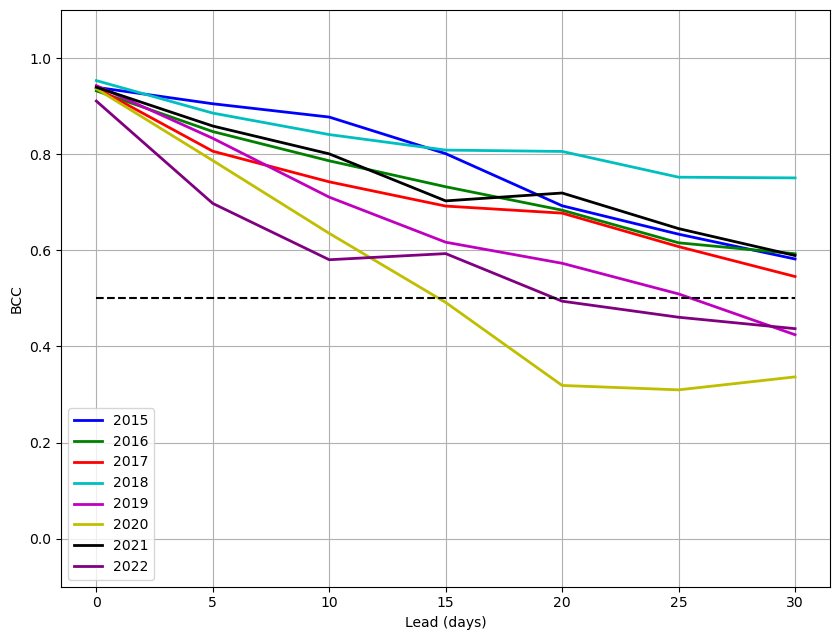

In [9]:
# plot the results
fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']
k=0

for year in range(2015, 2023):
    with open(f'./plot_data/bcc_list_{year}.pkl', 'rb') as f:
        bcc_list = pickle.load(f)

    bcc_opt = []

    for lead in [0, 5, 10, 15, 20, 25, 30]:
        bcc_dict = bcc_list[(lead, 1)]  # This is a list of dictionaries
        bcc_values = [list(bcci.values())[0] for bcci in bcc_dict]  # Extract BCC values
        sorted_indices = sorted(range(len(bcc_values)), key=lambda i: bcc_values[i], reverse=True)[:5]
        bcc_opt.append(bcc_values[sorted_indices[0]])

    file_names = [list(bcci.keys())[0] for bcci in bcc_dict]
    print(f'{year}: {os.path.basename(file_names[sorted_indices[0]])}, min: {bcc_values[sorted_indices[4]].values}, max: {bcc_values[sorted_indices[0]].values}')
    print(f'{year}: {os.path.basename(file_names[sorted_indices[1]])}')
    print(f'{year}: {os.path.basename(file_names[sorted_indices[2]])}')
    print(f'{year}: {os.path.basename(file_names[sorted_indices[3]])}')
    print(f'{year}: {os.path.basename(file_names[sorted_indices[4]])}')
    ax.plot(np.arange(0, 35, 5), bcc_opt, colors[k], linewidth=2, label=f'{year}')
    k += 1

    

ax.plot(np.arange(0, 35, 5), np.ones(7) * 0.5, 'k--')

ax.set_xlabel("Lead (days)")
ax.set_ylabel("BCC")
ax.grid(True)
ax.legend()
ax.set_ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()


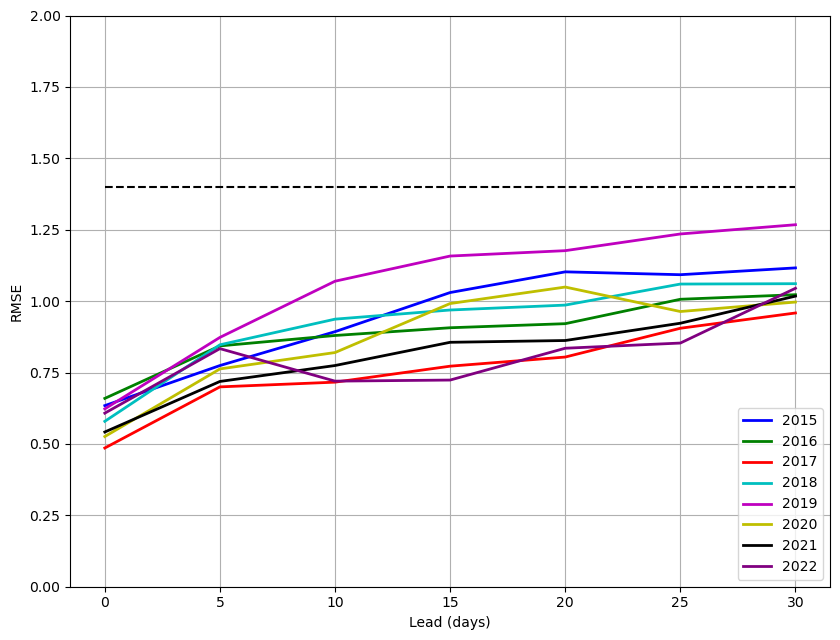

In [10]:
# plot the results
fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']
k=0

for year in range(2015, 2023):
    with open(f'./plot_data/rmse_list_{year}.pkl', 'rb') as f:
        rmse_list = pickle.load(f)

    rmse_opt = []

    for lead in [0, 5, 10, 15, 20, 25, 30]:
        rmse_dict = rmse_list[(lead, 1)]  # This is a list of dictionaries
        rmse_values = [list(rmsei.values())[0] for rmsei in rmse_dict]  # Extract BCC values
        sorted_indices = sorted(range(len(rmse_values)), key=lambda i: rmse_values[i], reverse=True)[-2:]
        rmse_opt.append(rmse_values[sorted_indices[0]])

    ax.plot(np.arange(0, 35, 5), rmse_opt, colors[k], linewidth=2, label=f'{year}')
    k += 1

ax.plot(np.arange(0, 35, 5), np.ones(7) * 1.4, 'k--')

ax.set_xlabel("Lead (days)")
ax.set_ylabel("RMSE")
ax.grid(True)
ax.legend()
ax.set_ylim(0.0, 2)
plt.tight_layout()
plt.show()


In [15]:
ys = 2015
ye = 2020
bcc_list, rmse_list = mjo.get_skill_hpo_exp1(
    mjo_ind='ROMI',
    datesta=f'{ys}-01-01',
    dateend=f'{ye}-12-31',   
    rule= 'Iamp>1.0',
    month_list=None,
    base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20/exp',
    exp = 1,
    lead_list=[0,5,10,15,20, 25, 30],
    lat_ranges = [10, 15],
    learning_rates=[0.001, 0.005],
    batch_sizes=[32, 64],
    dropouts=[0.1, 0.3, 0.5],
    epochs=[20,],
    optimizers=["SGD",],
    momentum=[0.9,],
    weight_decay=[0.005],
    memory_lasts=[95, 29],
    kernel_sizes=[25, 13, 7, 3],
    channels_list_strs=["32_8",],
    hidden_layers_strs=["1024_128",]
)

# store bcc_list and rmse_list
import pickle
with open(f'./plot_data/bcc_list_{ys}to{ye}.pkl', 'wb') as f:
    pickle.dump(bcc_list, f)

with open(f'./plot_data/rmse_list_{ys}to{ye}.pkl', 'wb') as f:
    pickle.dump(rmse_list, f)

    

In [16]:
ys = 2021
ye = 2022
bcc_list, rmse_list = mjo.get_skill_hpo_exp1(
    mjo_ind='ROMI',
    datesta=f'{ys}-01-01',
    dateend=f'{ye}-12-31',   
    rule= 'Iamp>1.0',
    month_list=None,
    base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20/exp',
    exp = 1,
    lead_list=[0,5,10,15,20, 25, 30],
    lat_ranges = [10, 15],
    learning_rates=[0.001, 0.005],
    batch_sizes=[32, 64],
    dropouts=[0.1, 0.3, 0.5],
    epochs=[20,],
    optimizers=["SGD",],
    momentum=[0.9,],
    weight_decay=[0.005],
    memory_lasts=[95, 29],
    kernel_sizes=[25, 13, 7, 3],
    channels_list_strs=["32_8",],
    hidden_layers_strs=["1024_128",]
)

# store bcc_list and rmse_list
import pickle
with open(f'./plot_data/bcc_list_{ys}to{ye}.pkl', 'wb') as f:
    pickle.dump(bcc_list, f)

with open(f'./plot_data/rmse_list_{ys}to{ye}.pkl', 'wb') as f:
    pickle.dump(rmse_list, f)

    

OLR_15deg_lead25_lr0.005_batch32_dropout0.3_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
OLR_10deg_lead25_lr0.005_batch64_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
OLR_10deg_lead25_lr0.001_batch32_dropout0.5_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
OLR_10deg_lead25_lr0.001_batch32_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
OLR_10deg_lead25_lr0.005_batch64_dropout0.1_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
OLR_15deg_lead25_lr0.005_batch64_dropout0.5_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
OLR_10deg_lead25_lr0.001_batch64_dropout0.3_ch_32_8_ksize_7_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
OLR_10deg_lead25_lr0.001_batch64_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
OLR_10deg_lead25_lr0.005_batch32_dropout0.1_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
OLR_10deg_lead25_lr0.001_b

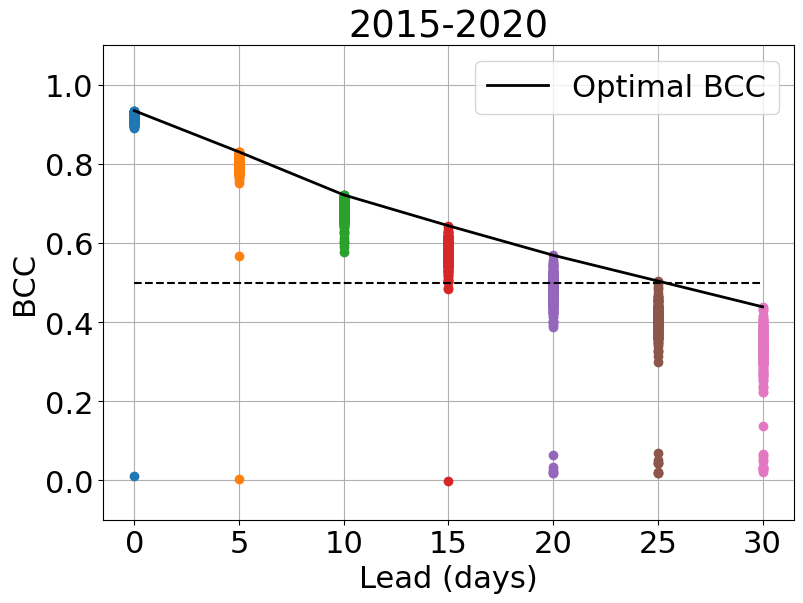

In [11]:
with open(f'./plot_data/bcc_list_2015to2020.pkl', 'rb') as f:
    bcc_list = pickle.load(f)

plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6.5))

bcc = {}
files = {}
flt_files = {}

bcc_opt = []

for lead in [0, 5, 10, 15, 20, 25, 30]:
    bcc_dict = bcc_list[(lead, 1)]  # This is a list of dictionaries
    bcc_values = [list(bcci.values())[0] for bcci in bcc_dict]  # Extract BCC values
    file_names = [list(bcci.keys())[0] for bcci in bcc_dict]    # Extract corresponding file names
    # filtered_files = [file_names[i] for i, bcci in enumerate(bcc_values) if bcc >= 0.4]
    sorted_indices = sorted(range(len(bcc_values)), key=lambda i: bcc_values[i], reverse=True)[:10]
    filtered_files = [file_names[i] for i in sorted_indices]
    bcc_opt.append(bcc_values[sorted_indices[0]])

    bcc[lead] = bcc_values
    files[lead] = file_names
    flt_files[lead] = filtered_files

    ax.plot(lead * np.ones(len(bcc_values)), bcc_values, 'o')

    if lead == 25:
        # Print debug information for filtered files
        for i in range(len(filtered_files)):
            # print(f'lead 30, 2015-2020: {os.path.basename(filtered_files[i])}, bcc: {bcc_values[sorted_indices[i]].values}')

            print(f'{os.path.basename(filtered_files[i])}')

ax.plot(np.arange(0, 35, 5), bcc_opt, 'k', linewidth=2, label='Optimal BCC')
ax.plot(np.arange(0, 35, 5), np.ones(7) * 0.5, 'k--')

ax.set_xlabel("Lead (days)")
ax.set_ylabel("BCC")
ax.set_title("2015-2020")
ax.grid(True)
ax.legend()
ax.set_ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()



In [14]:
# based on the best model, predict 2021-2022 bcc and rmse
dirp = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20/exp1/'

fn_list_best = [
f'{dirp}OLR_15deg_lead25_lr0.005_batch32_dropout0.3_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc',
f'{dirp}OLR_10deg_lead25_lr0.005_batch64_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc',
f'{dirp}OLR_10deg_lead25_lr0.001_batch32_dropout0.5_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc',
f'{dirp}OLR_10deg_lead25_lr0.001_batch32_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc',
f'{dirp}OLR_10deg_lead25_lr0.005_batch64_dropout0.1_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc',
f'{dirp}OLR_15deg_lead25_lr0.005_batch64_dropout0.5_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc',
f'{dirp}OLR_10deg_lead25_lr0.001_batch64_dropout0.3_ch_32_8_ksize_7_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc',
]

bcc = []
rmse = []
for fn in fn_list_best:
    x, y = mjo.get_skill_one('ROMI', fn, datesta='2021-01-01', dateend='2022-12-31')
    x, y = mjo.get_skill_one('ROMI', fn, datesta='2015-01-01', dateend='2020-12-31')
    bcc.append(x.values)
    rmse.append(y.values)



In [13]:
print(bcc)

[array(0.5254315), array(0.40545096), array(0.35965889), array(0.41476302), array(0.41556323), array(0.31433258), array(0.41561716)]


In [15]:
print(bcc)

[array(0.50385717), array(0.50140178), array(0.4954794), array(0.48928479), array(0.48317691), array(0.47256985), array(0.46673467)]


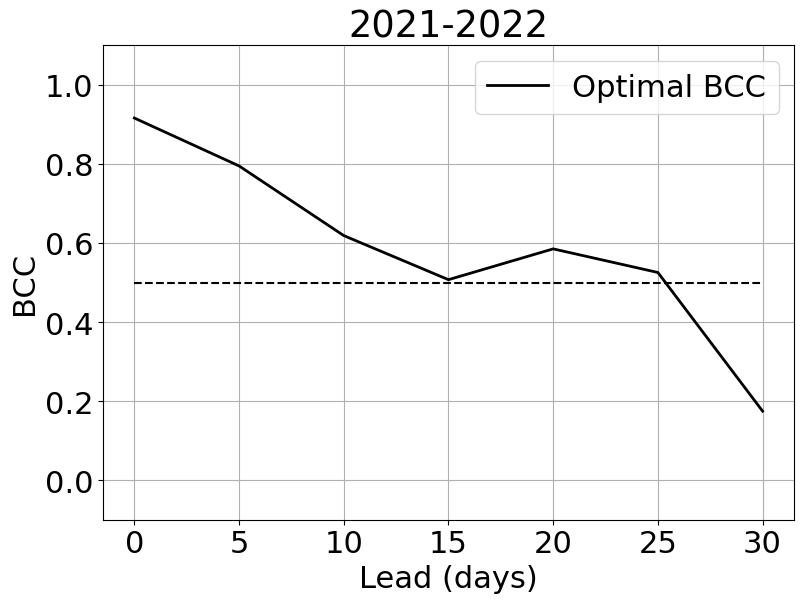

In [21]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6.5))
bcc_opt = np.asarray(bcc)
ax.plot(np.arange(0, 35, 5), bcc_opt, 'k', linewidth=2, label='Optimal BCC')
ax.plot(np.arange(0, 35, 5), np.ones(7) * 0.5, 'k--')

ax.set_xlabel("Lead (days)")
ax.set_ylabel("BCC")
ax.set_title("2021-2022")
ax.grid(True)
ax.legend()
ax.set_ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()



filtered_files[0]: OLR_15deg_lead0_lr0.005_batch32_dropout0.3_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_15deg_lead5_lr0.005_batch64_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_15deg_lead10_lr0.005_batch32_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_10deg_lead15_lr0.005_batch64_dropout0.1_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_10deg_lead20_lr0.005_batch64_dropout0.3_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_10deg_lead25_lr0.001_batch64_dropout0.1_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_15deg_lead30_lr0.001_batch64_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc


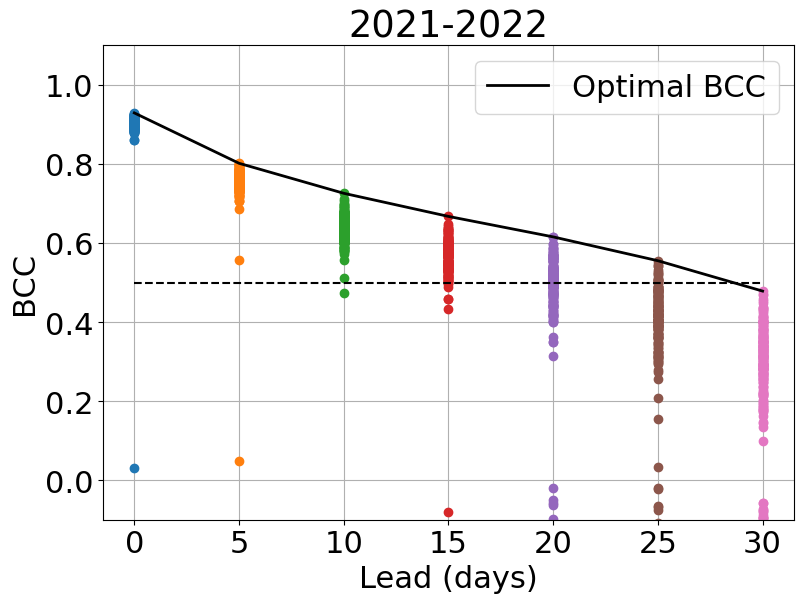

In [17]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6.5))

bcc = {}
files = {}
flt_files = {}

bcc_opt = []

for lead in [0, 5, 10, 15, 20, 25, 30]:
    bcc_dict = bcc_list[(lead, 1)]  # This is a list of dictionaries
    bcc_values = [list(bcci.values())[0] for bcci in bcc_dict]  # Extract BCC values
    file_names = [list(bcci.keys())[0] for bcci in bcc_dict]    # Extract corresponding file names
    # filtered_files = [file_names[i] for i, bcci in enumerate(bcc_values) if bcc >= 0.4]
    sorted_indices = sorted(range(len(bcc_values)), key=lambda i: bcc_values[i], reverse=True)[:1]
    filtered_files = [file_names[i] for i in sorted_indices]
    bcc_opt.append(bcc_values[sorted_indices[0]])

    bcc[lead] = bcc_values
    files[lead] = file_names
    flt_files[lead] = filtered_files

    ax.plot(lead * np.ones(len(bcc_values)), bcc_values, 'o')

    # Print debug information for filtered files
    for i in range(len(filtered_files)):
        print(f'filtered_files[{i}]: {os.path.basename(filtered_files[i])}')

ax.plot(np.arange(0, 35, 5), bcc_opt, 'k', linewidth=2, label='Optimal BCC')
ax.plot(np.arange(0, 35, 5), np.ones(7) * 0.5, 'k--')

ax.set_xlabel("Lead (days)")
ax.set_ylabel("BCC")
ax.set_title("2021-2022")
ax.grid(True)
ax.legend()
ax.set_ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()



In [ ]:
OLR_15deg_lead25_lr0.005_batch32_dropout0.3_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
OLR_10deg_lead25_lr0.001_batch64_dropout0.1_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc

In [13]:
bcc_list, rmse_list = mjo.get_skill_hpo_exp1(
    mjo_ind='ROMI',
    datesta='2017-01-01',
    dateend='2022-12-31',   
    rule= 'Iamp>1.0',
    month_list=None,
    base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20/exp',
    exp = 1,
    lead_list=[0,5,10,15,20, 25, 30],
    lat_ranges = [10, 15],
    learning_rates=[0.001, 0.005],
    batch_sizes=[32, 64],
    dropouts=[0.1, 0.3, 0.5],
    epochs=[20,],
    optimizers=["SGD",],
    momentum=[0.9,],
    weight_decay=[0.005],
    memory_lasts=[95, 29],
    kernel_sizes=[25, 13, 7, 3],
    channels_list_strs=["32_8",],
    hidden_layers_strs=["1024_128",]
)

# store bcc_list and rmse_list
import pickle
with open('./plot_data/bcc_list_2017to2022.pkl', 'wb') as f:
    pickle.dump(bcc_list, f)

with open('./plot_data/rmse_list_2017to2022.pkl', 'wb') as f:
    pickle.dump(rmse_list, f)

    

filtered_files[0]: OLR_15deg_lead0_lr0.005_batch32_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_15deg_lead5_lr0.001_batch64_dropout0.5_ch_32_8_ksize_13_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_15deg_lead10_lr0.001_batch64_dropout0.5_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_10deg_lead15_lr0.001_batch32_dropout0.5_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_10deg_lead20_lr0.005_batch32_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_10deg_lead25_lr0.005_batch64_dropout0.1_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_15deg_lead30_lr0.005_batch64_dropout0.3_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc


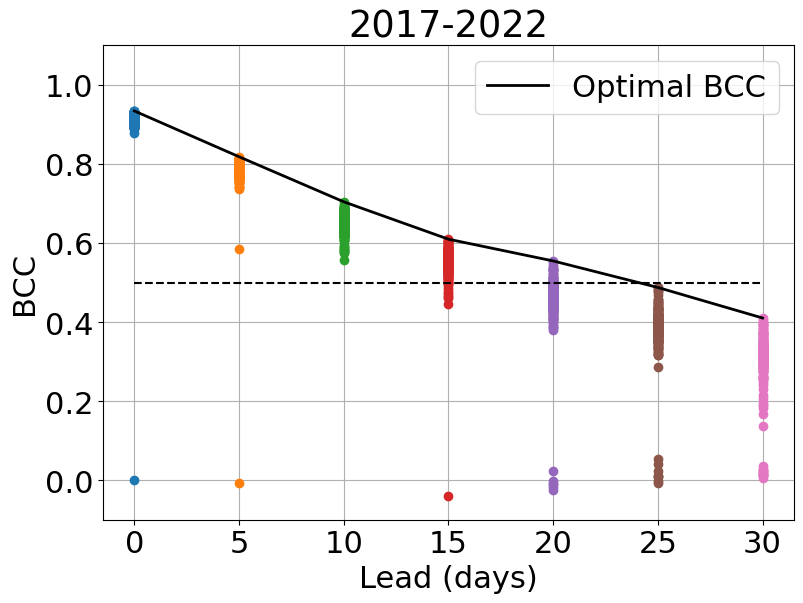

In [14]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6.5))

bcc = {}
files = {}
flt_files = {}

bcc_opt = []

for lead in [0, 5, 10, 15, 20, 25, 30]:
    bcc_dict = bcc_list[(lead, 1)]  # This is a list of dictionaries
    bcc_values = [list(bcci.values())[0] for bcci in bcc_dict]  # Extract BCC values
    file_names = [list(bcci.keys())[0] for bcci in bcc_dict]    # Extract corresponding file names
    # filtered_files = [file_names[i] for i, bcci in enumerate(bcc_values) if bcc >= 0.4]
    sorted_indices = sorted(range(len(bcc_values)), key=lambda i: bcc_values[i], reverse=True)[:1]
    filtered_files = [file_names[i] for i in sorted_indices]
    bcc_opt.append(bcc_values[sorted_indices[0]])

    bcc[lead] = bcc_values
    files[lead] = file_names
    flt_files[lead] = filtered_files

    ax.plot(lead * np.ones(len(bcc_values)), bcc_values, 'o')

    # Print debug information for filtered files
    for i in range(len(filtered_files)):
        print(f'filtered_files[{i}]: {os.path.basename(filtered_files[i])}')

ax.plot(np.arange(0, 35, 5), bcc_opt, 'k', linewidth=2, label='Optimal BCC')
ax.plot(np.arange(0, 35, 5), np.ones(7) * 0.5, 'k--')

ax.set_xlabel("Lead (days)")
ax.set_ylabel("BCC")
ax.set_title("2017-2022")
ax.grid(True)
ax.legend()
ax.set_ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()



filtered_files[0]: OLR_15deg_lead0_lr0.001_batch64_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_10deg_lead5_lr0.001_batch32_dropout0.5_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_10deg_lead10_lr0.001_batch64_dropout0.1_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_15deg_lead15_lr0.001_batch32_dropout0.1_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_10deg_lead20_lr0.005_batch64_dropout0.1_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_10deg_lead25_lr0.001_batch32_dropout0.3_ch_32_8_ksize_7_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_10deg_lead30_lr0.005_batch64_dropout0.1_ch_32_8_ksize_7_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc


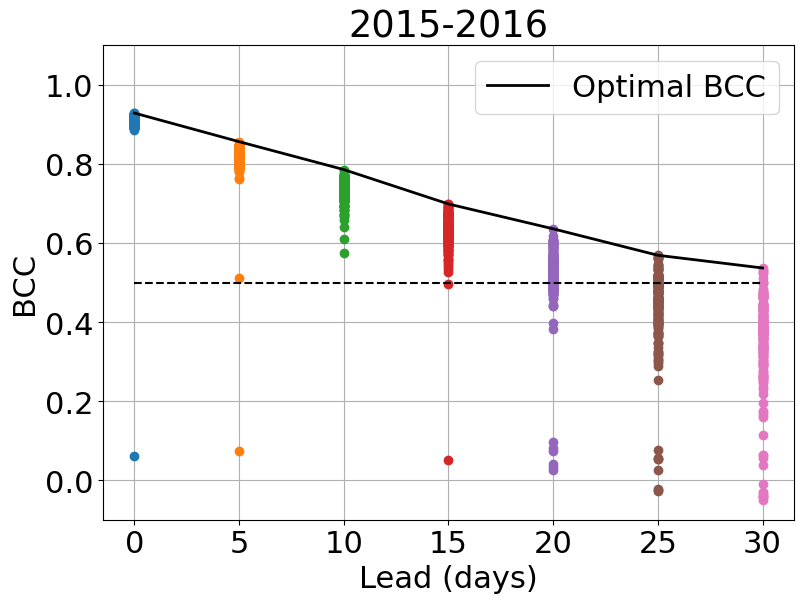

In [12]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6.5))

bcc = {}
files = {}
flt_files = {}

bcc_opt = []

for lead in [0, 5, 10, 15, 20, 25, 30]:
    bcc_dict = bcc_list[(lead, 1)]  # This is a list of dictionaries
    bcc_values = [list(bcci.values())[0] for bcci in bcc_dict]  # Extract BCC values
    file_names = [list(bcci.keys())[0] for bcci in bcc_dict]    # Extract corresponding file names
    # filtered_files = [file_names[i] for i, bcci in enumerate(bcc_values) if bcc >= 0.4]
    sorted_indices = sorted(range(len(bcc_values)), key=lambda i: bcc_values[i], reverse=True)[:1]
    filtered_files = [file_names[i] for i in sorted_indices]
    bcc_opt.append(bcc_values[sorted_indices[0]])

    bcc[lead] = bcc_values
    files[lead] = file_names
    flt_files[lead] = filtered_files

    ax.plot(lead * np.ones(len(bcc_values)), bcc_values, 'o')

    # Print debug information for filtered files
    for i in range(len(filtered_files)):
        print(f'filtered_files[{i}]: {os.path.basename(filtered_files[i])}')

ax.plot(np.arange(0, 35, 5), bcc_opt, 'k', linewidth=2, label='Optimal BCC')
ax.plot(np.arange(0, 35, 5), np.ones(7) * 0.5, 'k--')

ax.set_xlabel("Lead (days)")
ax.set_ylabel("BCC")
ax.set_title("2015-2016")
ax.grid(True)
ax.legend()
ax.set_ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()



filtered_files[0]: OLR_15deg_lead0_lr0.001_batch64_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_10deg_lead5_lr0.005_batch64_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
filtered_files[0]: OLR_10deg_lead10_lr0.005_batch64_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_10deg_lead15_lr0.001_batch32_dropout0.5_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_10deg_lead20_lr0.001_batch32_dropout0.5_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_10deg_lead25_lr0.005_batch64_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc
filtered_files[0]: OLR_10deg_lead30_lr0.005_batch64_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem95.nc


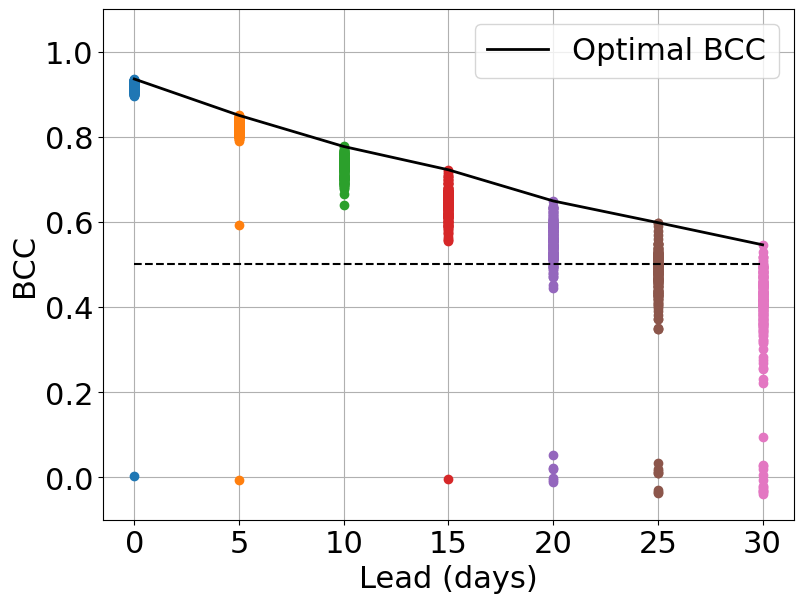

In [7]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6.5))

bcc = {}
files = {}
flt_files = {}

bcc_opt = []

for lead in [0, 5, 10, 15, 20, 25, 30]:
    bcc_dict = bcc_list[(lead, 1)]  # This is a list of dictionaries
    bcc_values = [list(bcc.values())[0] for bcc in bcc_dict]  # Extract BCC values
    file_names = [list(bcc.keys())[0] for bcc in bcc_dict]    # Extract corresponding file names
    # filtered_files = [file_names[i] for i, bcc in enumerate(bcc_values) if bcc >= 0.4]
    sorted_indices = sorted(range(len(bcc_values)), key=lambda i: bcc_values[i], reverse=True)[:1]
    filtered_files = [file_names[i] for i in sorted_indices]
    bcc_opt.append(bcc_values[sorted_indices[0]])

    bcc[lead] = bcc_values
    files[lead] = file_names
    flt_files[lead] = filtered_files

    ax.plot(lead * np.ones(len(bcc_values)), bcc_values, 'o')

    # Print debug information for filtered files
    for i in range(len(filtered_files)):
        print(f'filtered_files[{i}]: {os.path.basename(filtered_files[i])}')

ax.plot(np.arange(0, 35, 5), bcc_opt, 'k', linewidth=2, label='Optimal BCC')
ax.plot(np.arange(0, 35, 5), np.ones(7) * 0.5, 'k--')

ax.set_xlabel("Lead (days)")
ax.set_ylabel("BCC")
ax.grid(True)
ax.legend()
ax.set_ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()



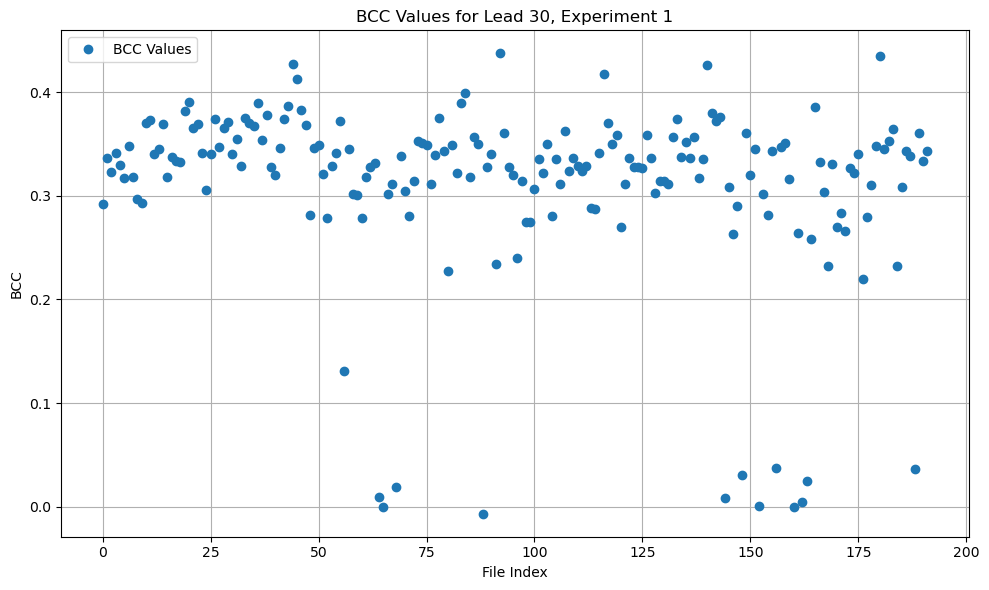

OLR_10deg_lead30_lr0.001_batch64_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
OLR_10deg_lead30_lr0.001_batch64_dropout0.5_ch_32_8_ksize_13_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
OLR_10deg_lead30_lr0.005_batch64_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
OLR_15deg_lead30_lr0.001_batch32_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
OLR_15deg_lead30_lr0.001_batch64_dropout0.5_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc
OLR_15deg_lead30_lr0.005_batch64_dropout0.3_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc


In [19]:
bcc_dict = bcc_list[(30, 1)]  # This is a list of dictionaries
bcc_values = [list(bcc.values())[0] for bcc in bcc_dict]  # Extract BCC values
file_names = [list(bcc.keys())[0] for bcc in bcc_dict]    # Extract corresponding file names

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(bcc_values, 'o', label="BCC Values")
ax.set_xlabel("File Index")
ax.set_ylabel("BCC")
ax.set_title("BCC Values for Lead 30, Experiment 1")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

filtered_files = [file_names[i] for i, bcc in enumerate(bcc_values) if bcc >= 0.4]
for file in filtered_files:
    print(os.path.basename(file))

In [18]:
lead_list = np.arange(0,31,5)
exp_list = ['1', ]
fn_list = mjo.generate_fn_list(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                               lead_list=lead_list, exp_list=exp_list, lat=15, mem=95, fileflg='OLR.rossby.*')

bcc0, rmse0 = mjo.get_skill_parallel('ROMI', fn_list, lead_list=lead_list, exp_list=exp_list)

bcc95rossby = np.empty((len(lead_list), len(exp_list)))
rmse95rossby = np.empty((len(lead_list), len(exp_list)))

for i, lead in enumerate(lead_list):
    for j, exp in enumerate(exp_list):
        bcc95rossby[i,j] = bcc0[(lead, f'{exp}')]
        rmse95rossby[i,j] = rmse0[(lead, f'{exp}')]

In [ ]:
lead_list = np.arange(0,31,5)
exp_list = ['1', ]
fn_list = mjo.generate_fn_list(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                               lead_list=lead_list, exp_list=exp_list, lat=15, mem=95, fileflg='OLR.mjo.*')

bcc0, rmse0 = mjo.get_skill_parallel('ROMI', fn_list, lead_list=lead_list, exp_list=exp_list)

bcc95mjo = np.empty((len(lead_list), len(exp_list)))
rmse95mjo = np.empty((len(lead_list), len(exp_list)))

for i, lead in enumerate(lead_list):
    for j, exp in enumerate(exp_list):
        bcc95mjo[i,j] = bcc0[(lead, f'{exp}')]
        rmse95mjo[i,j] = rmse0[(lead, f'{exp}')]

In [13]:
lead_list = np.arange(0,31,5)
exp_list = ['1', ]
fn_list = mjo.generate_fn_list(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                               lead_list=lead_list, exp_list=exp_list, lat=15, mem=95, fileflg='OLR_*')
bcc0, rmse0 = mjo.get_skill_parallel('ROMI', fn_list, lead_list=lead_list, exp_list=exp_list)

bcc95 = np.empty((len(lead_list), len(exp_list)))
rmse95 = np.empty((len(lead_list), len(exp_list)))

for i, lead in enumerate(lead_list):
    for j, exp in enumerate(exp_list):
        bcc95[i,j] = bcc0[(lead, f'{exp}')]
        rmse95[i,j] = rmse0[(lead, f'{exp}')]

In [2]:
lead_list = np.arange(0,31,5)
exp_list = ['1', ]
fn_list = mjo.generate_fn_list(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                               lead_list=lead_list, exp_list=exp_list, lat=20, mem=4)
bcc0, rmse0 = mjo.get_skill_parallel('ROMI', fn_list, lead_list=lead_list, exp_list=exp_list)

bcc5 = np.empty((len(lead_list), len(exp_list)))
rmse5 = np.empty((len(lead_list), len(exp_list)))

for i, lead in enumerate(lead_list):
    for j, exp in enumerate(exp_list):
        bcc5[i,j] = bcc0[(lead, f'{exp}')]
        rmse5[i,j] = rmse0[(lead, f'{exp}')]

In [3]:
lead_list = np.arange(0,31,5)
exp_list = ['1', ]
fn_list = mjo.generate_fn_list(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                               lead_list=lead_list, exp_list=exp_list, lat=20, mem=9)
bcc0, rmse0 = mjo.get_skill_parallel('ROMI', fn_list, lead_list=lead_list, exp_list=exp_list)

bcc10 = np.empty((len(lead_list), len(exp_list)))
rmse10 = np.empty((len(lead_list), len(exp_list)))

for i, lead in enumerate(lead_list):
    for j, exp in enumerate(exp_list):
        bcc10[i,j] = bcc0[(lead, f'{exp}')]
        rmse10[i,j] = rmse0[(lead, f'{exp}')]

In [4]:
lead_list = np.arange(0,31,5)
exp_list = ['1', ]
fn_list = mjo.generate_fn_list(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                               lead_list=lead_list, exp_list=exp_list, lat=20, mem=59)
bcc0, rmse0 = mjo.get_skill_parallel('ROMI', fn_list, lead_list=lead_list, exp_list=exp_list)

bcc60 = np.empty((len(lead_list), len(exp_list)))
rmse60 = np.empty((len(lead_list), len(exp_list)))

for i, lead in enumerate(lead_list):
    for j, exp in enumerate(exp_list):
        bcc60[i,j] = bcc0[(lead, f'{exp}')]
        rmse60[i,j] = rmse0[(lead, f'{exp}')]

In [5]:
lead_list = np.arange(0,31,5)
exp_list = ['1', ]
fn_list = mjo.generate_fn_list(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                               lead_list=lead_list, exp_list=exp_list, lat=20)
bcc0, rmse0 = mjo.get_skill_parallel('ROMI', fn_list, lead_list=lead_list, exp_list=exp_list)

bcc20 = np.empty((len(lead_list), len(exp_list)))
rmse20 = np.empty((len(lead_list), len(exp_list)))

for i, lead in enumerate(lead_list):
    for j, exp in enumerate(exp_list):
        bcc20[i,j] = bcc0[(lead, f'{exp}')]
        rmse20[i,j] = rmse0[(lead, f'{exp}')]

In [6]:
lead_list = np.arange(0,31,5)
exp_list = ['1', ]
fn_list = mjo.generate_fn_list(base_dir='/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/epo20',
                               lead_list=lead_list, exp_list=exp_list, lat=10)
bcc0, rmse0 = mjo.get_skill_parallel('ROMI', fn_list, lead_list=lead_list, exp_list=exp_list)

bcc = np.empty((len(lead_list), len(exp_list)))
rmse = np.empty((len(lead_list), len(exp_list)))

for i, lead in enumerate(lead_list):
    for j, exp in enumerate(exp_list):
        bcc[i,j] = bcc0[(lead, f'{exp}')]
        rmse[i,j] = rmse0[(lead, f'{exp}')]


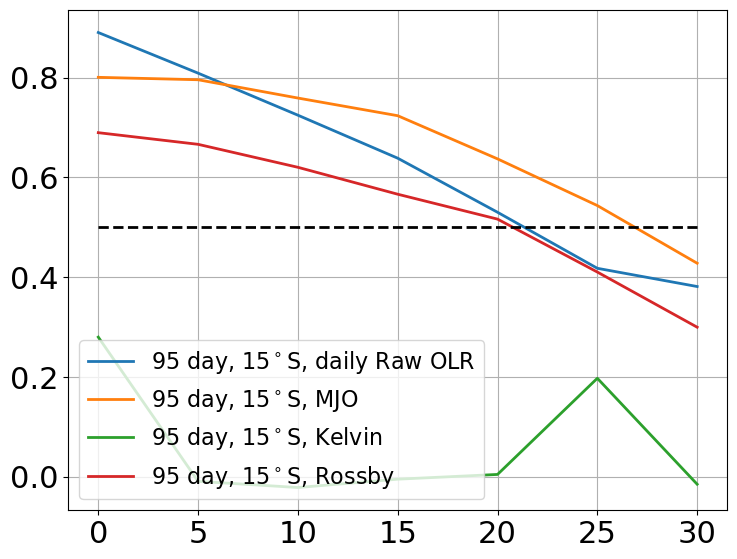

In [20]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8.5,6.5))
# ax.plot(lead_list, bcc, linewidth=2, label='30day, 10$^\circ$S')  
# ax.plot(lead_list, bcc20, linewidth=2, label='30day, 20$^\circ$S')
# ax.plot(lead_list, bcc60, linewidth=2, label='60 day, 20$^\circ$S')
# ax.plot(lead_list, bcc10, linewidth=2, label='10 day, 20$^\circ$S')  
# ax.plot(lead_list, bcc5, linewidth=2, label='5 day, 20$^\circ$S')
ax.plot(lead_list, bcc95, linewidth=2, label='95 day, 15$^\circ$S, daily Raw OLR')
ax.plot(lead_list, bcc95mjo, linewidth=2, label='95 day, 15$^\circ$S, MJO')
ax.plot(lead_list, bcc95kelvin, linewidth=2, label='95 day, 15$^\circ$S, Kelvin')
ax.plot(lead_list, bcc95rossby, linewidth=2, label='95 day, 15$^\circ$S, Rossby')
ax.plot(lead_list, bcc95 * 0 + 0.5, 'k--', linewidth=2)
ax.grid(visible=True)   
ax.legend(fontsize=16) 

In [30]:
fn_rossby = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/data/processed/plots/power_spectra_sym_rossby_k-1to-10_T10to100.nc'
fn_kelvin = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/data/processed/plots/power_spectra_sym_kelvin_k1to10_T2.5to30.nc'
fn_mjo = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/data/processed/plots/power_spectra_sym_rawandmjo_k1to5_T20to100.nc'

power_sym_rossby = xr.open_dataarray(fn_rossby)
power_sym_kelvin = xr.open_dataarray(fn_kelvin)
power_sym_mjo = xr.open_dataset(fn_mjo)['power_sym_mjo']
power_sym = xr.open_dataset(fn_mjo)['power_sym']

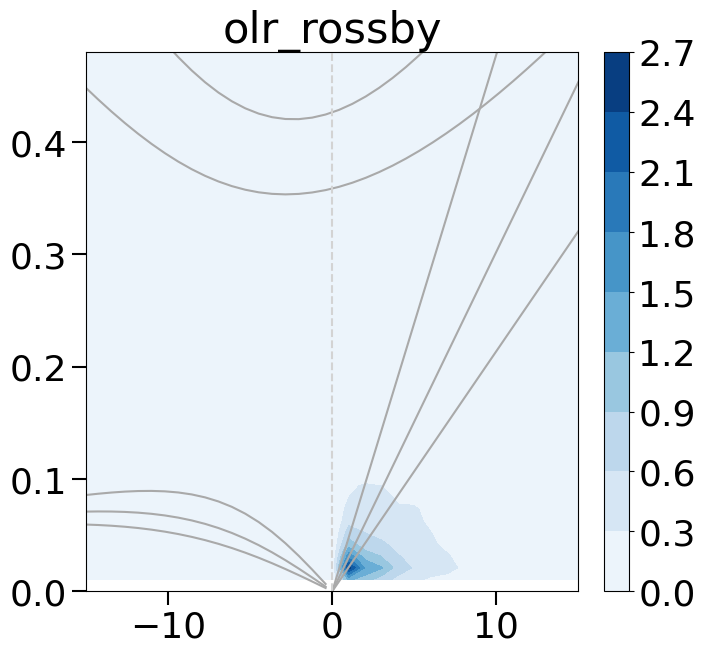

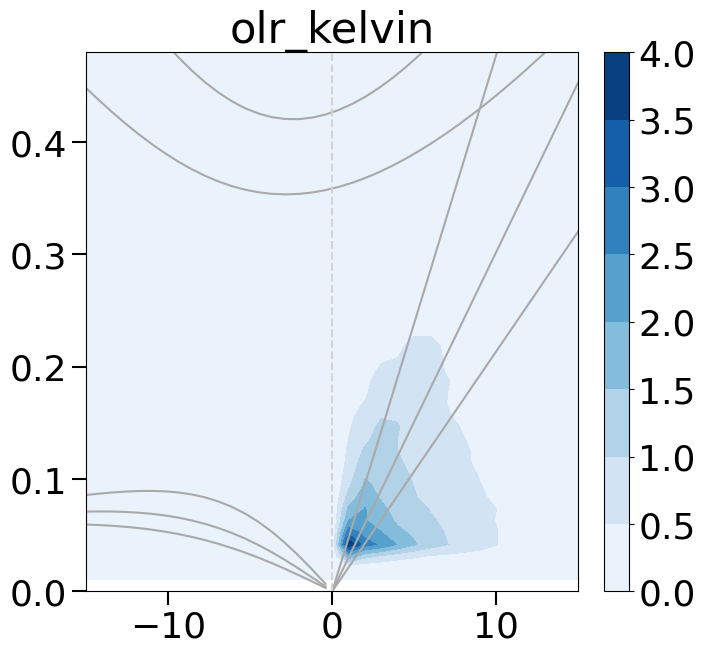

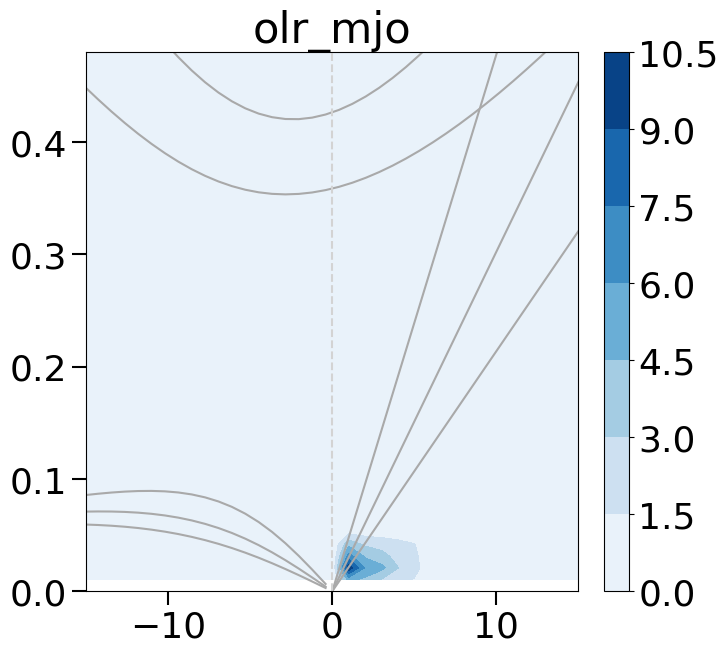

In [31]:
wk.wk_plot_sym(power_sym_rossby, 'olr_rossby', logflg=False)
wk.wk_plot_sym(power_sym_kelvin, 'olr_kelvin', logflg=False)
wk.wk_plot_sym(power_sym_mjo, 'olr_mjo', logflg=False)